In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('Earthquake.csv')

In [5]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2009-12-31T09:57:29.720Z,27.319,91.510,10.0,5.5,mb,205.0,37.4,NaN,0.89,...,2017-04-26T18:09:55.932Z,Bhutan,earthquake,NaN,NaN,NaN,118.0,reviewed,us,us
1,2009-12-29T13:33:22.870Z,35.017,73.005,63.8,4.0,mb,40.0,95.8,NaN,0.94,...,2014-11-07T01:40:19.294Z,northwestern Kashmir,earthquake,NaN,8.6,NaN,7.0,reviewed,us,us
2,2009-12-29T09:01:55.310Z,24.357,94.807,124.8,5.6,mwb,206.0,17.3,NaN,0.77,...,2016-11-10T02:22:03.905Z,Myanmar-India border region,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
3,2009-12-28T02:15:04.870Z,30.686,83.769,10.0,4.4,mb,50.0,40.6,NaN,1.08,...,2014-11-07T01:40:19.031Z,western Xizang,earthquake,NaN,NaN,NaN,9.0,reviewed,us,us
4,2009-12-26T00:23:38.570Z,14.001,92.862,42.6,5.0,mb,117.0,68.1,NaN,0.82,...,2014-11-07T01:40:18.641Z,"Andaman Islands, India region",earthquake,NaN,5.7,NaN,56.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,2010-01-11T16:07:13.800Z,36.041,70.893,104.7,4.6,mb,41.0,93.7,NaN,1.11,...,2014-11-07T01:40:26.476Z,"Hindu Kush region, Afghanistan",earthquake,NaN,NaN,NaN,6.0,reviewed,us,us
14694,2010-01-11T05:15:16.160Z,29.744,80.557,35.0,4.7,mb,27.0,84.6,NaN,1.09,...,2014-11-07T01:40:26.418Z,Nepal-India border region,earthquake,NaN,0.0,NaN,4.0,reviewed,us,us
14695,2010-01-11T03:38:43.300Z,14.243,93.505,66.4,4.0,mb,18.0,181.4,NaN,0.85,...,2014-11-07T01:40:26.412Z,"Andaman Islands, India region",earthquake,NaN,22.2,NaN,2.0,reviewed,us,us
14696,2010-01-05T14:28:18.340Z,32.384,85.273,54.1,4.9,mb,58.0,108.2,NaN,0.83,...,2014-11-07T01:40:25.340Z,western Xizang,earthquake,NaN,11.4,NaN,15.0,reviewed,us,us


In [7]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14698 entries, 0 to 14697
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             14698 non-null  object 
 1   latitude         14698 non-null  float64
 2   longitude        14698 non-null  float64
 3   depth            14698 non-null  float64
 4   mag              14698 non-null  float64
 5   magType          14698 non-null  object 
 6   nst              11841 non-null  float64
 7   gap              12978 non-null  float64
 8   dmin             2694 non-null   float64
 9   rms              14691 non-null  float64
 10  net              14698 non-null  object 
 11  id               14698 non-null  object 
 12  updated          14698 non-null  object 
 13  place            14698 non-null  object 
 14  type             14698 non-null  object 
 15  horizontalError  2073 non-null   float64
 16  depthError       6755 non-null   float64
 17  magError    

In [11]:
df=df.drop(["horizontalError","depthError","magError","magNst","status","locationSource","magSource"],axis=1)

In [13]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2009-12-31T09:57:29.720Z,27.319,91.510,10.0,5.5,mb,205.0,37.4,NaN,0.89,us,usp000h5j5,2017-04-26T18:09:55.932Z,Bhutan,earthquake
1,2009-12-29T13:33:22.870Z,35.017,73.005,63.8,4.0,mb,40.0,95.8,NaN,0.94,us,usp000h5fh,2014-11-07T01:40:19.294Z,northwestern Kashmir,earthquake
2,2009-12-29T09:01:55.310Z,24.357,94.807,124.8,5.6,mwb,206.0,17.3,NaN,0.77,us,usp000h5f4,2016-11-10T02:22:03.905Z,Myanmar-India border region,earthquake
3,2009-12-28T02:15:04.870Z,30.686,83.769,10.0,4.4,mb,50.0,40.6,NaN,1.08,us,usp000h5e0,2014-11-07T01:40:19.031Z,western Xizang,earthquake
4,2009-12-26T00:23:38.570Z,14.001,92.862,42.6,5.0,mb,117.0,68.1,NaN,0.82,us,usp000h5c9,2014-11-07T01:40:18.641Z,"Andaman Islands, India region",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,2010-01-11T16:07:13.800Z,36.041,70.893,104.7,4.6,mb,41.0,93.7,NaN,1.11,us,usp000h5yu,2014-11-07T01:40:26.476Z,"Hindu Kush region, Afghanistan",earthquake
14694,2010-01-11T05:15:16.160Z,29.744,80.557,35.0,4.7,mb,27.0,84.6,NaN,1.09,us,usp000h5y8,2014-11-07T01:40:26.418Z,Nepal-India border region,earthquake
14695,2010-01-11T03:38:43.300Z,14.243,93.505,66.4,4.0,mb,18.0,181.4,NaN,0.85,us,usp000h5y6,2014-11-07T01:40:26.412Z,"Andaman Islands, India region",earthquake
14696,2010-01-05T14:28:18.340Z,32.384,85.273,54.1,4.9,mb,58.0,108.2,NaN,0.83,us,usp000h5s1,2014-11-07T01:40:25.340Z,western Xizang,earthquake


In [27]:
df.to_csv('C:/Users/srisr/OneDrive/Desktop/powerbi_project/Earthquake_updated.csv',index=False)

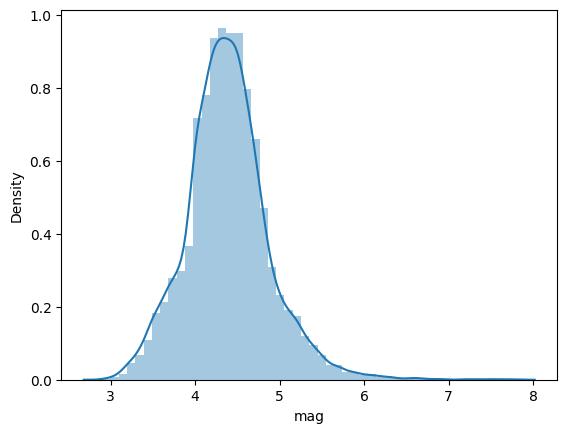

In [15]:
sns.distplot(df['mag'])
plt.show()

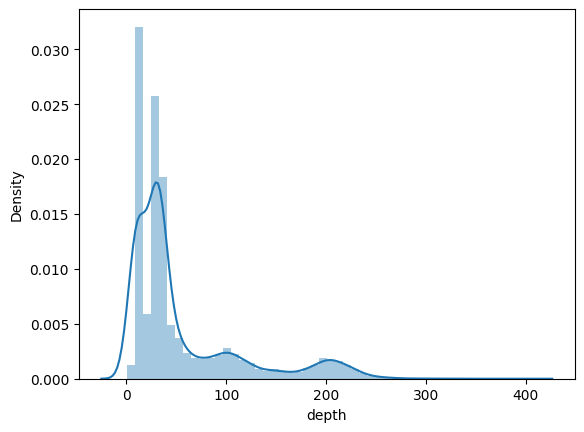

In [19]:
sns.distplot(df['depth'])
plt.show()

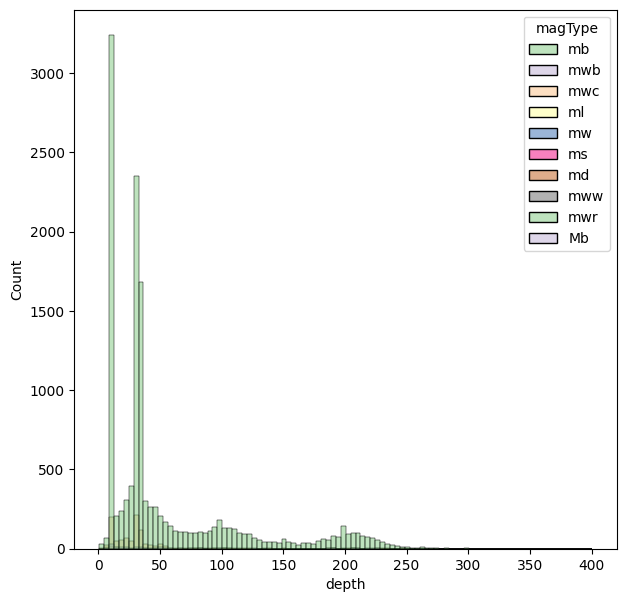

In [21]:
plt.figure(figsize=(7,7))
sns.histplot(data=df, x='depth', hue='magType',palette = 'Accent')
plt.show()

<Figure size 700x700 with 0 Axes>

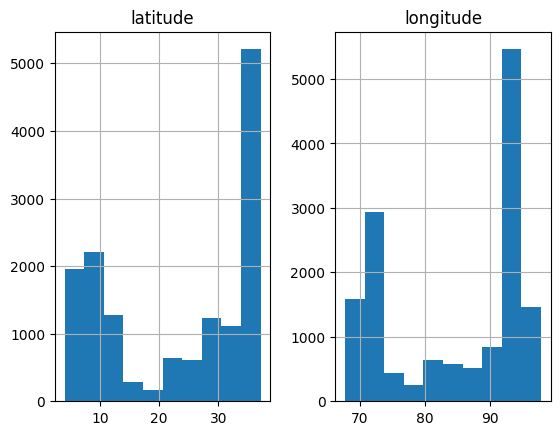

In [23]:
plt.figure(figsize=(7,7))
df[['latitude','longitude']].hist()
plt.show()

<Axes: xlabel='count', ylabel='magType'>

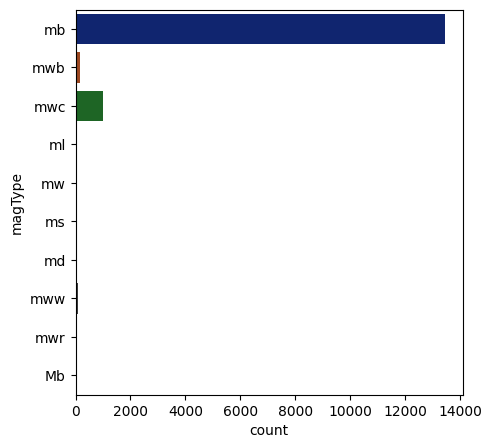

In [41]:
plt.figure(figsize=(5,5))
sns.countplot(df.magType,palette="dark")

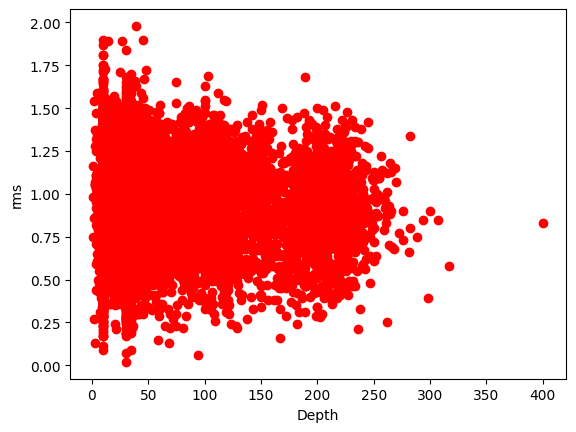

In [47]:
plt.scatter(df.depth, df.rms,color='red')
plt.xlabel("Depth")
plt.ylabel("rms")
plt.show()

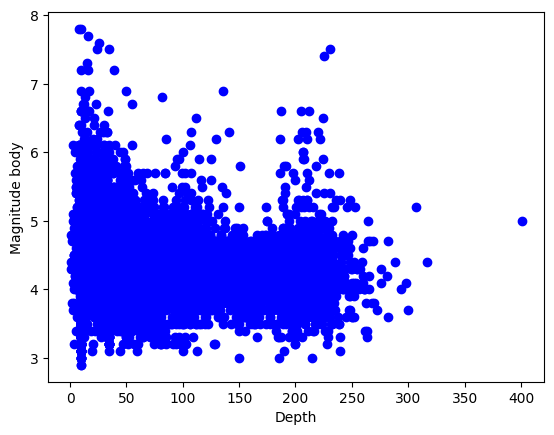

In [51]:
plt.scatter(df.depth, df.mag,color='blue')
plt.xlabel("Depth")
plt.ylabel("Magnitude body")
plt.show()

In [57]:
numeric=df.select_dtypes(include='number')

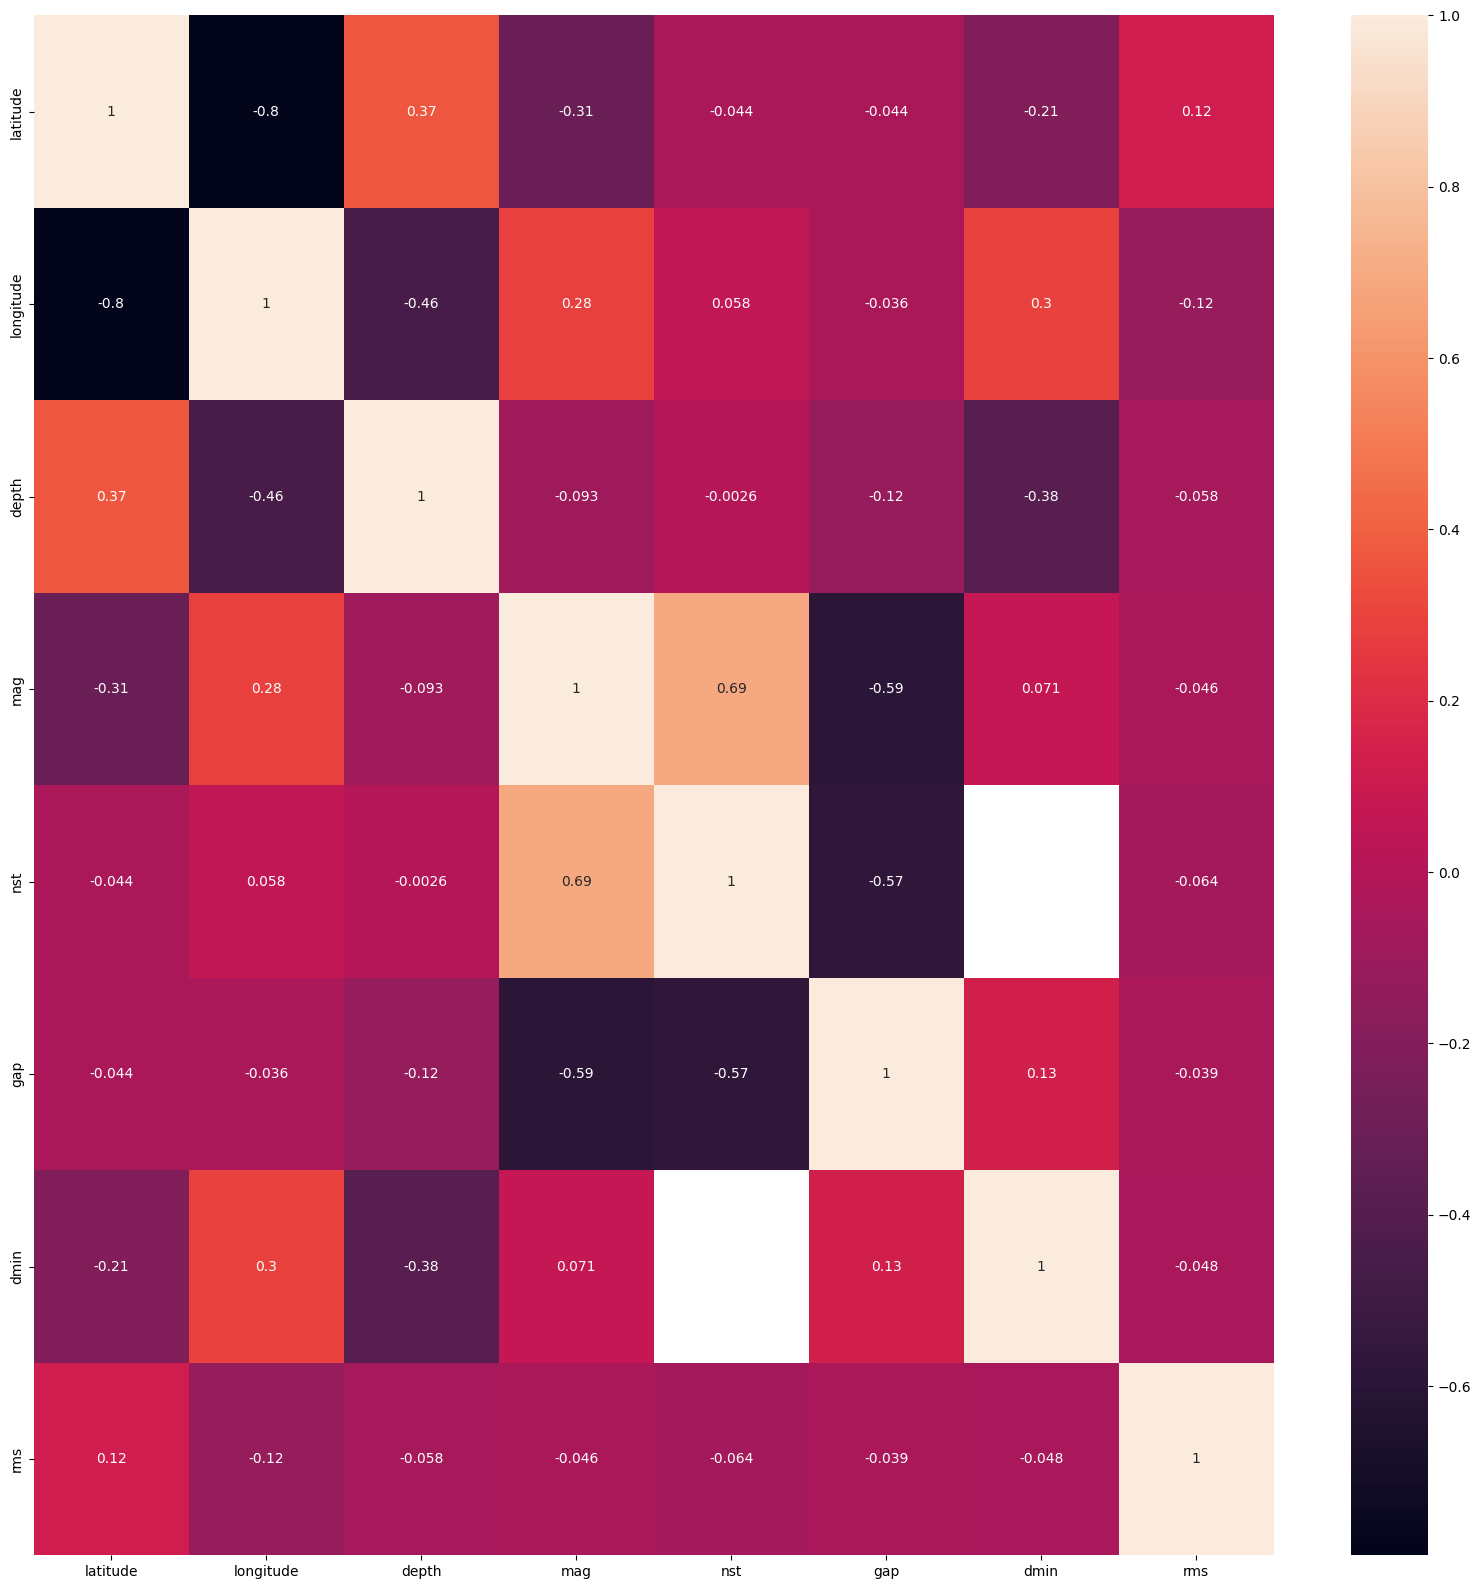

In [59]:
plt.figure(figsize=(20,20))
sns.heatmap(numeric.corr(),annot=True)
plt.show()